In [1]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from matplotlib import animation

tau = 2 * np.pi

In [2]:
from modules.visualize import plot_complex, double_plot

## Fourier Transform

[Continuous](https://en.wikipedia.org/wiki/Fourier_transform#The_Fourier_transform_on_R)
$$\hat{f}(\xi) = \int_{-\infty}^{\infty} f(x) e^{-i\tau\xi x} dx$$
$$f(x) = \int_{-\infty}^{\infty} \hat{f}(\xi) e^{i\tau\xi x} d\xi$$


[Discrete](https://en.wikipedia.org/wiki/Discrete_Fourier_transform#Definition)
$$X_{k} = \sum_{n=0}^{N-1} x_{n} e^{-i\tau kn / N}$$
$$x_{n} = \frac{1}{N}\sum_{k=0}^{N-1} X_{k} e^{i\tau kn / N}$$

In [3]:
from fourier_core import DFT, inv_DFT, compute_DFT_approximation

## Fourier Series

[Exponential form](https://en.wikipedia.org/wiki/Fourier_series#Exponential_form)

$$ c_{n} = \frac{1}{P} \int_{-P/2}^{P/2} s(x) e^{- \frac{i \tau n x}{P}} dx $$

$$ s(x) = \sum_{n=-\infty}^{\infty} c_{n} \cdot e^{\frac{i \tau n x}{P}} $$

To simplify things, let's keep the period $1$,

$$ c_{n} = \int_{0}^{1} s(x) e^{-i \tau n x} dx $$

If input is discrete then the integral can be approximated using \
numerical integration methods such as the [Riemann Sum](https://en.wikipedia.org/wiki/Riemann_sum):

$$ c_{n} = \sum_{x=0}^{1} s(x) e^{-i \tau n x} \Delta x $$ 
where $\Delta x = 1/N$, so

$$ c_{n} = \frac{1}{N} \sum_{x=0}^{1} s(x) e^{-i \tau n x} $$

$$ s(x) = \sum_{n=-\infty}^{\infty} c_{n} \cdot e^{i \tau n x} $$

In [4]:
from fourier_core import compute_coeffs, fourier_series, compute_fourier_approximation

## Joseph Fourier

https://twitter.com/Biocinematics/status/1143330623131738112/photo/1

https://www.amritaryal.com.np/posts/categories/mathematics-and-engineering/2.html

https://mohammed-a-elkomy.medium.com/yet-another-fourier-series-animation-in-python-6c3a1ac579b8

In [5]:
from modules.data_utils import parse_svg

In [6]:
points = parse_svg('data/fourier.svg')
# Make it centered around the origin (optional).
points -= points.mean()

paths:   0%|          | 0/1 [00:00<?, ?it/s]

time:   0%|          | 0/1001 [00:00<?, ?it/s]

### Fourier approximation

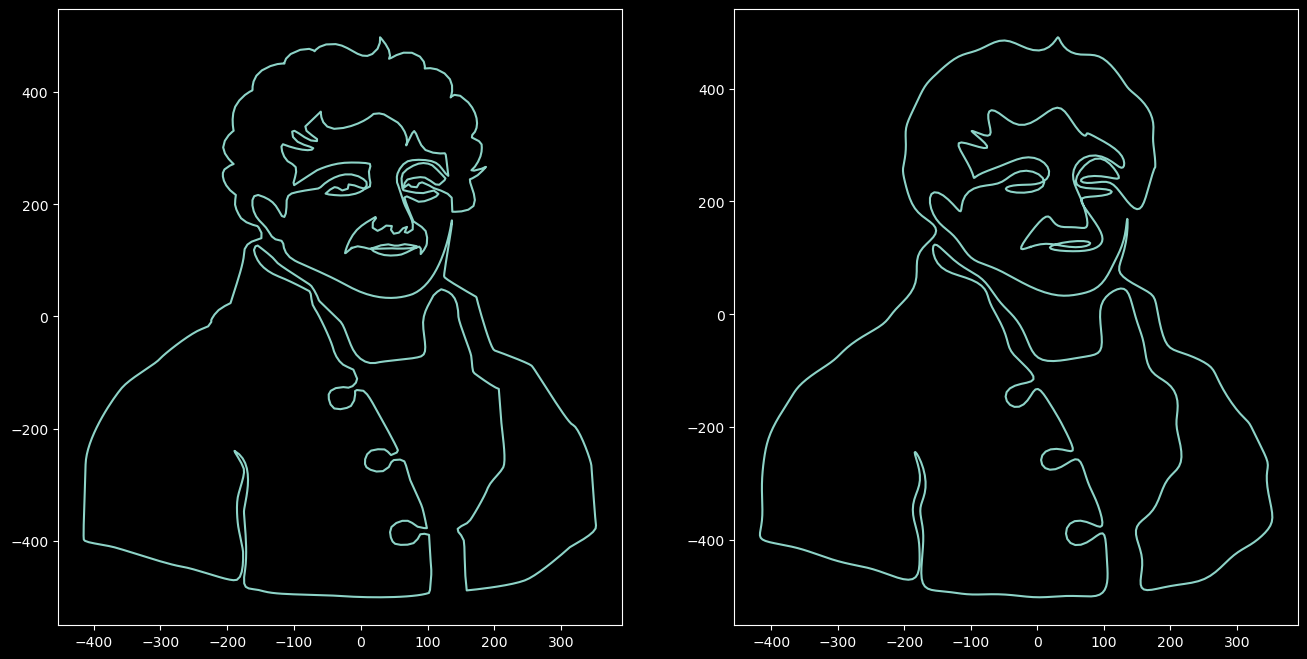

In [14]:
# Use fewer coeffs but same resolution.
points_appr = compute_fourier_approximation(points, num_coeffs=201, num_samples=len(points))

double_plot(points, points_appr)

### Approximation animation

#### Evolution (Coeff progression)

In [18]:
from modules.fourier_utils import compute_apprs
from modules.visualize import evolution_animate

In [19]:
num_coeffs = 301
coeffs = compute_coeffs(points, num_coeffs)

points_apprs = compute_apprs(points, coeffs)

calculating approximations:   0%|          | 0/301 [00:00<?, ?it/s]

calculating approximations:   0%|          | 0/301 [00:00<?, ?it/s]

calculating approximations:   0%|          | 0/301 [00:00<?, ?it/s]

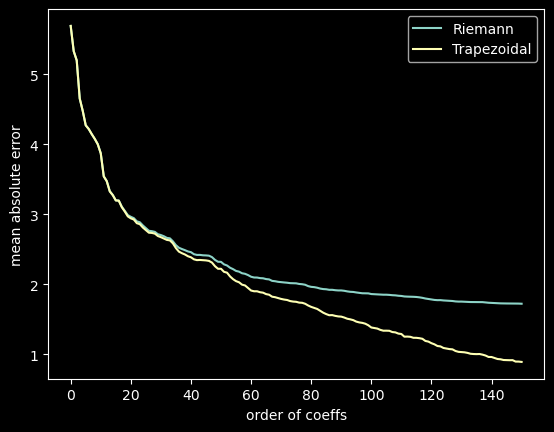

In [20]:
for rule in ['Riemann', 'Trapezoidal']:
  coeffs = compute_coeffs(points, num_coeffs, rule=rule)
  points_apprs = compute_apprs(points, coeffs)[::2]
  order_coeffs = abs(np.array(list(coeffs.keys())))[::2]
  errs = np.log(1+abs(points - points_apprs).mean(1))
  plt.plot(order_coeffs, errs, label=rule)
  plt.xlabel('order of coeffs')
  plt.ylabel('mean absolute error')
plt.legend()
plt.show()

In [21]:
"""All coeffs, sum upto [C0,C1,C-1,C2,C-2,...]
Basically [C0, C0+C1, C0+C1+C-1, C0+C1+C-1+C2, C0+C1+C-1+C2+C-2]"""
# points_apprs = dict(zip(range(1,1+len(points_apprs)), points_apprs))

"""At every even index we have sum of c_n and c_-n, sum upto [C0,C-1,C-2,...]
Basically [C0, C0+C1+C-1, C0+C1+C-1+C2+C-2]"""
points_apprs = {1+i*2: point_appr for i, point_appr in enumerate(points_apprs[::2])}

anim = evolution_animate(points_apprs)
anim.save(f"animations/evolution.gif", writer=animation.PillowWriter(fps=10))

generating evolution animation:   0%|          | 0/76 [00:00<?, ?it/s]

#### Epicycles (Time progression)

In [15]:
from modules.fourier_utils import compute_circle_centers
from modules.visualize import compute_arrows, epicycles_animate

$$ center_n = c_0 + \sum_{n=1}^{\left\lceil \frac{n}{2} \right\rceil} c_{-n} + \sum_{n=1}^{\left\lfloor \frac{n}{2} \right\rfloor} c_n $$

$$ radius_n = |center_{n+1} - center_n| 
 = |c_{{-1}^{n+1} \left\lceil \frac{n+1}{2} \right\rceil}| $$

Example: \
$ center_0 = c_0 $ \
$ center_1 = c_0 + c_{-1} $ \
$ center_2 = c_0 + c_{-1} + c_1 $ \
$ center_3 = c_0 + c_{-1} + c_1 + c_{-2} $


$ radius_0 = center_1 - center_0 = c_{-1} $ \
$ radius_1 = center_2 - center_1 = c_1 $ \
$ radius_2 = center_3 - center_2 = c_{-2} $

In [16]:
num_coeffs = 57
coeffs = compute_coeffs(points, num_coeffs)
n_samples = 500  # number of time points to sample

# At every even index we have sum of c_n and c_-n
centers_time = compute_circle_centers(coeffs, n_samples, sort=False)

calculating centers and radii:   0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
# Cell to test add_arrows function

pts = np.array([0, 1+1j, 2, 3+1j, 2+2j, 1j])
plot_complex(pts, color='white')
plt.show()

lines = np.column_stack((pts[:-1], pts[1:]))
arrows = compute_arrows(lines)

plot_complex(lines[::2].T, color='red')
plot_complex(lines[1::2].T, color='blue')
plot_complex(arrows[::2].T, color='red')
plot_complex(arrows[1::2].T, color='blue')
plt.show()

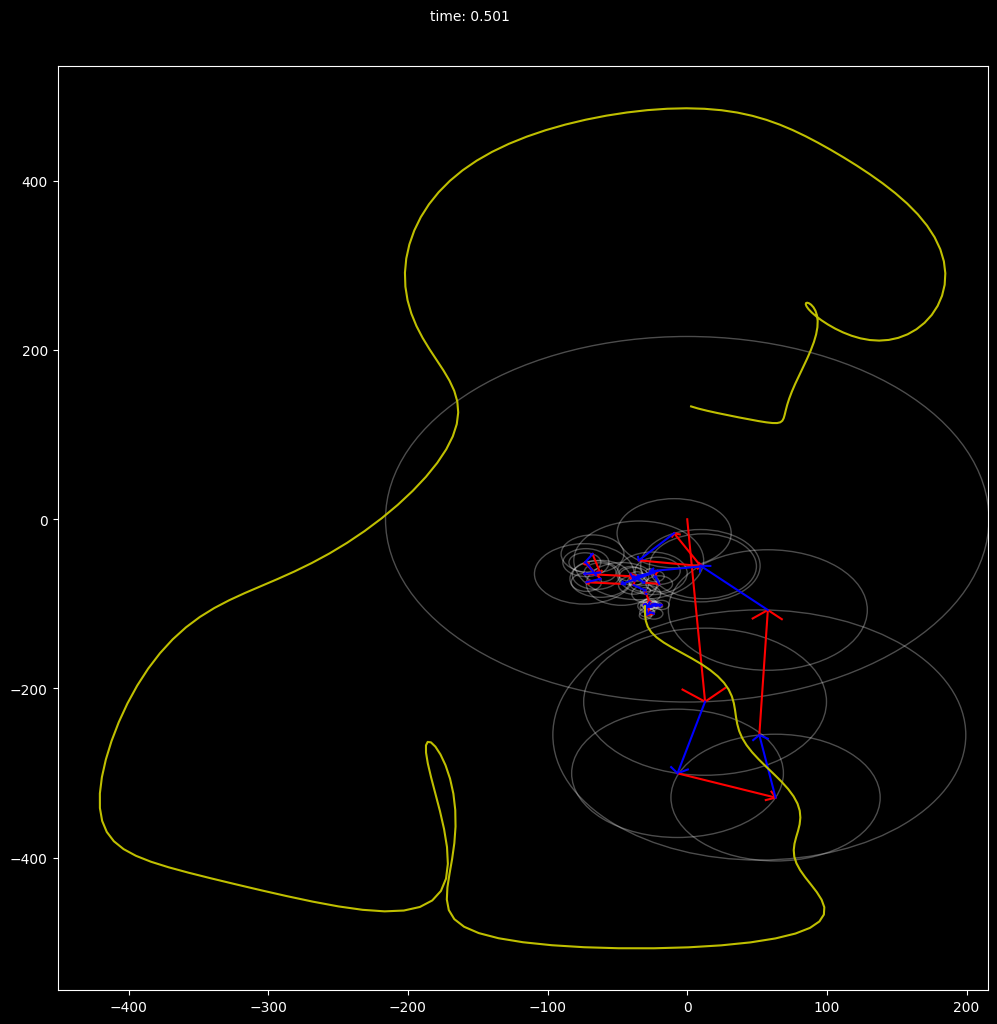

In [19]:
from modules.visualize import plot_circles, plot_colored_lines

fig, ax = plt.subplots(figsize=(12,12))
i = int(n_samples * 0.5)

centers = centers_time[i]
radii = abs(np.diff(centers))
lines = np.column_stack((centers[:-1], centers[1:]))
arrows = compute_arrows(lines)

theta = np.linspace(0, tau, 36)
circles = centers[:-1][:,None] + radii[:,None] * np.exp(1j * theta.T)

# Plot lines
centers = centers_time[i]
# plot_complex(centers, color='white')
plot_colored_lines(arrows)

# Plot arrows.
# plot_complex(arrows.T, color='white')
plot_colored_lines(lines)

# Plot curve.
plot_complex(centers_time[:i+1, -1], c='y')

# plot circles.
# plot_complex(circles.T, c='w', alpha=0.3)
plot_circles(centers, radii)

plt.text(0.4, 1.05, f'time: {i/(n_samples-1):.3f}', transform = plt.gca().transAxes)

plt.show()

In [20]:
anim = epicycles_animate(centers_time, detail=17)
anim.save(f"animations/epicycles_{num_coeffs}.gif", writer=animation.PillowWriter(fps=10))

generating epicycles animation:   0%|          | 0/500 [00:00<?, ?it/s]